# Building Decision Trees for Classification

We are going to discuss the process of building a decision tree classifier for the diabetes problem. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Let us first import libraries that we are going to use during our work.

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split

We are building a model that is going to make predictions, so we need to find a way to evaluate the quality of these predictions in order to trust them. Since predictions by definition is for some unseen input, we cannot depend on the data that we used to create the model. We first need to divide the dataset into two non-intersecting parts: training data that is going to be used for building the model and test data for evaluating the model predictions.

In [15]:
dataset = pd.read_csv('Datasets/diabetes.csv')
X = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = dataset[['Outcome']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
Y_train.describe()

,Outcome
count,614.000000
mean,0.359935
std,0.480372
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
Y_test.describe()

,Outcome
count,154.000000
mean,0.305195
std,0.461992
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


We are ready now to build our first classifier. We use the training data to build our decision tree model. Then we are going to evaluate its score using the test set. 

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state = 0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, Y_train)

# Evaluate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(X_test, Y_test)

0.76623376623376627

Congratualtions! We got around 77% accuracy on our first classifier. Let us first visualize the decision tree built.

In [36]:
from sklearn import tree

dot_file = tree.export_graphviz(decision_tree_classifier, out_file='tree_a1.dot', 
                                feature_names = list(dataset)[0:-1],
                                class_names = ['healthy', 'ill']) 


We noticed that the decision tree built is very deep and too complicated. This indicates that the model 
will not be able to generalize well. This phenomenon is called overfitting. Mainly, the model memorizes
the training data and would have high accuracy on the training data but will perform badly on unseen ones.

In [26]:
print("Accuracy on training set: {:.3f}".format(decision_tree_classifier.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(decision_tree_classifier.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.766


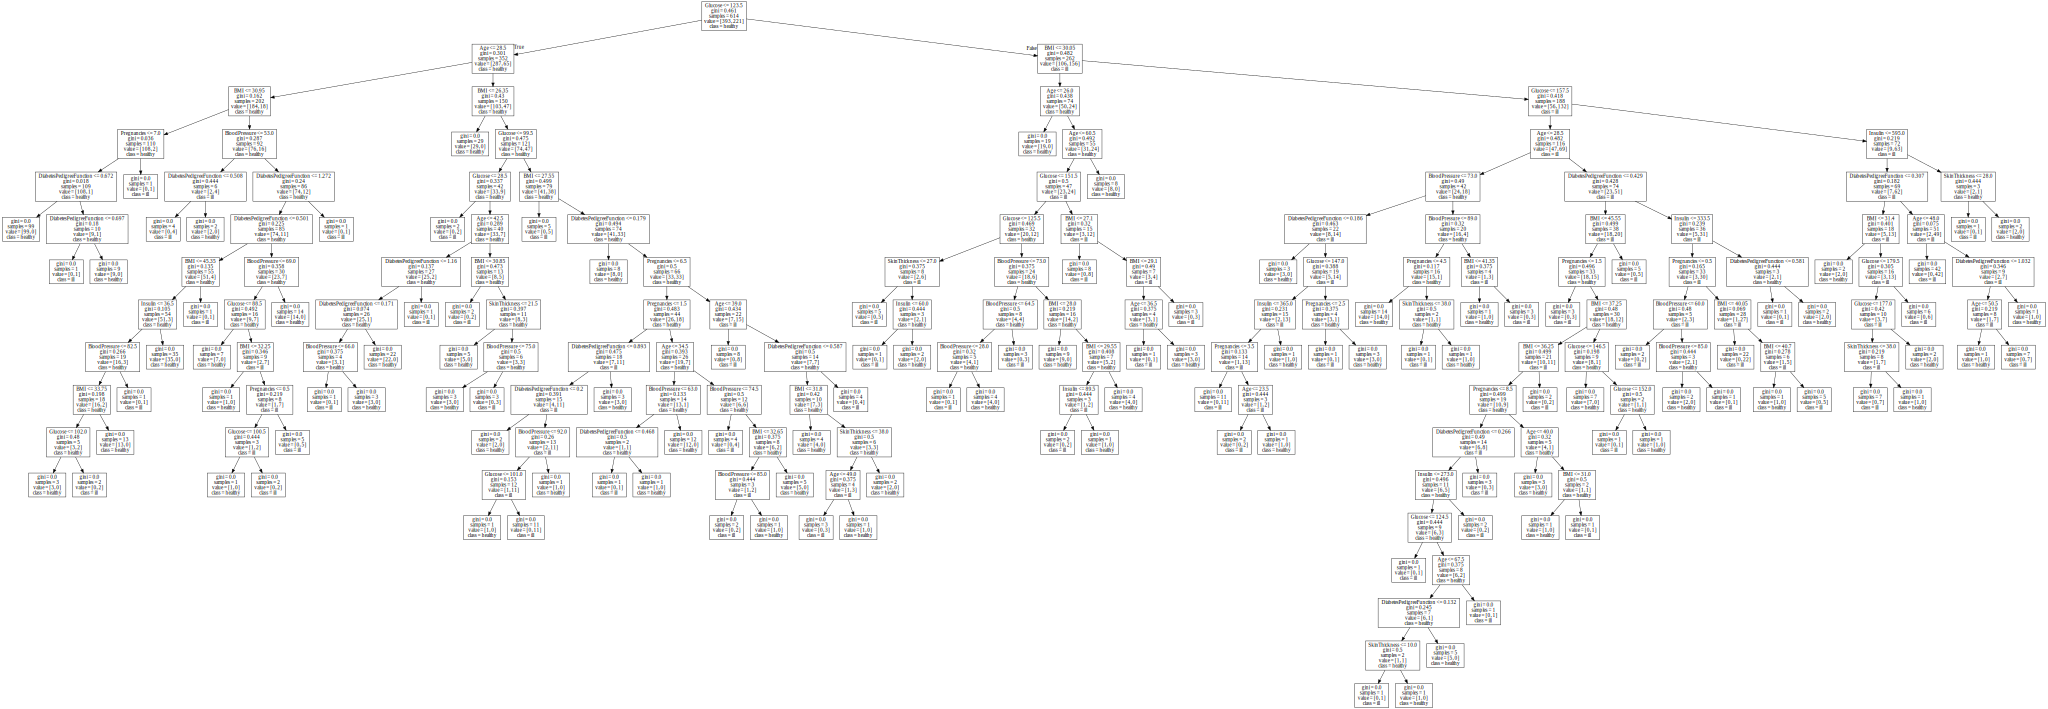

In [37]:
import graphviz
with open("tree_a1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

To avoid overfitting, we can attempt to reduce the complexity of the model. This can be done during building the model
(pre-pruning) or after building it (post-pruning). Sklearn provide built-in functions to control pre-pruning like
limiting the depth of the model. 

In [44]:
decision_tree_pruned = DecisionTreeClassifier(random_state = 0, max_depth = 2)

decision_tree_pruned.fit(X_train, Y_train)
decision_tree_pruned.score(X_test, Y_test)

0.75974025974025972

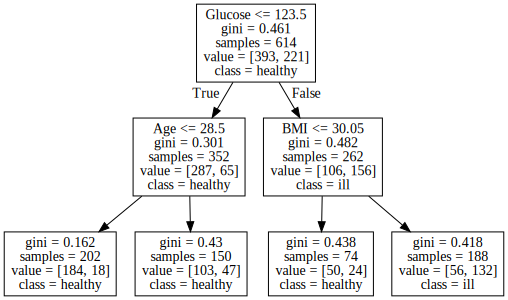

In [45]:
pre_pruned_dot_file = tree.export_graphviz(decision_tree_pruned, out_file='tree_pruned.dot', 
                                feature_names = list(dataset)[0:-1],
                                class_names = ['healthy', 'ill'])
with open("tree_pruned.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

What other parameters can be used for pre-pruning? Experiment with different parameters and check how the results vary.

hint: consult http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html